In [1]:
import numpy as np
import pandas as pd
import glob
import datetime

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc #한글지원
import platform
import seaborn as sns
plt.rc("font",family='Malgun Gothic') #한글_글꼴
plt.rcParams['axes.unicode_minus'] = False #음수표시

In [40]:
### fault_name 범주 확인

f_path = 'train/train_faults/'
files = glob.glob(f_path + '*.csv')
f_set = set()
f_lis = []

for file in files:
    temp = pd.read_csv(file)['fault_name']
    a = list(temp.values)
    f_set.update(a)
    f_lis += a
f_set

{'FlowCool Pressure Dropped Below Limit',
 'Flowcool Pressure Too High Check Flowcool Pump',
 'Flowcool Pressure Too High Check Flowcool Pump [NoWaferID]',
 'Flowcool leak'}

In [63]:
### fault_name value_counts

for val in f_set:
    print('{:60} : {}'.format(val, f_lis.count(val)))
print('-'*70)
print('{:60} : 1236'.format('total'))

Flowcool leak                                                : 139
Flowcool Pressure Too High Check Flowcool Pump [NoWaferID]   : 1
FlowCool Pressure Dropped Below Limit                        : 756
Flowcool Pressure Too High Check Flowcool Pump               : 340
----------------------------------------------------------------------
total                                                        : 1236


In [181]:
### 01~10이 무슨 의미인가?

f_path = 'train/'
files = glob.glob(f_path + '*.csv')
start_lis = []
end_lis = []

for file in files:
    temp = pd.read_csv(file)
        
    # 초 단위의 입력 값
    minutes_s = int(temp['time'][0]) //60
    minutes_e = int(temp['time'][len(temp)-1])//60
    start_lis.append(datetime.datetime.fromtimestamp(minutes_s))
    end_lis.append(datetime.datetime.fromtimestamp(minutes_e))

In [182]:
temp2 = pd.DataFrame([start_lis, end_lis]).transpose()
temp2.columns=['start', 'end']
temp2

,start,end
0,1970-01-02 00:11:58,1970-01-09 16:14:48
1,1970-01-02 00:12:10,1970-01-09 01:12:44
2,1970-01-02 00:12:08,1970-01-07 15:26:22
3,1970-01-02 00:11:59,1970-01-08 09:54:44
4,1970-01-02 00:12:57,1970-01-09 09:51:41
5,1970-01-02 00:12:25,1970-01-09 20:50:28
6,1970-01-02 00:11:58,1970-01-09 18:58:51
7,1970-01-02 03:30:25,1970-01-09 13:45:20
8,1970-01-02 00:11:20,1970-01-09 14:23:13
9,1970-01-02 00:12:51,1970-01-09 17:15:02


----------
### 이상 전후 패턴 확인

In [35]:
a = 'train\\01_M01_DC_train.csv'
b = 'train/train_faults\\01_M01_train_fault_data.csv'

# file_read
df1 = pd.read_csv(a)
df2 = pd.read_csv(b)

# df1에 없는 시간대 찾기
time_lis = list(set(df2['time']) - set(df1['time']))
df12 = pd.concat([df1,pd.DataFrame({'time':time_lis})], ignore_index=True)
df12 = df12.sort_values(by='time') # 시간 순 정렬

# 선형보간법
df12 = df12.interpolate(method='linear')
#df12 = df12.fillna({'Tool':'{}{}'.format('01','M01')})

# 시각화
idx = a[a['time'] == 6533184].index[0]
b = a.iloc[idx-300:idx+301,:]
col = a.columns[7:]
plt.figure(figsize=(23,19))

for i in range(1,18):
    plt.subplot(6,3,i)
    plt.plot(b['time'], b[col[i-1]])
    plt.title(col[i-1])
    plt.axvline(6533184, 0, 1, c = 'red', linestyle='--', linewidth=0.5)
    plt.gca().axes.xaxis.set_visible(False)#x범위 없애기
    plt.gca().axes.yaxis.set_visible(False)#y범위 없애기
plt.subplots_adjust(hspace=0.3,wspace=0.2)
plt.show()

0      6533184
1      8286500
2      8627086
3      8697340
4      8971484
5     12638238
6     12828064
7     14026692
8     15827488
9     18573644
10    20174938
11    26098948
12    31212736
13    31229684
14    31231428
15    39525730
16    40082846
17    40567036
18    42056638
Name: time, dtype: int64

In [72]:
time_lis = list(set(df2['time']) - set(df1['time']))
df12 = pd.concat([df1,pd.DataFrame({'time':time_lis})], ignore_index=True)
df12 = df12.sort_values(by='time', ignore_index=True) # 시간 순 정렬

In [84]:
df2['time']

0      6533184
1      8286500
2      8627086
3      8697340
4      8971484
5     12638238
6     12828064
7     14026692
8     15827488
9     18573644
10    20174938
11    26098948
12    31212736
13    31229684
14    31231428
15    39525730
16    40082846
17    40567036
18    42056638
Name: time, dtype: int64

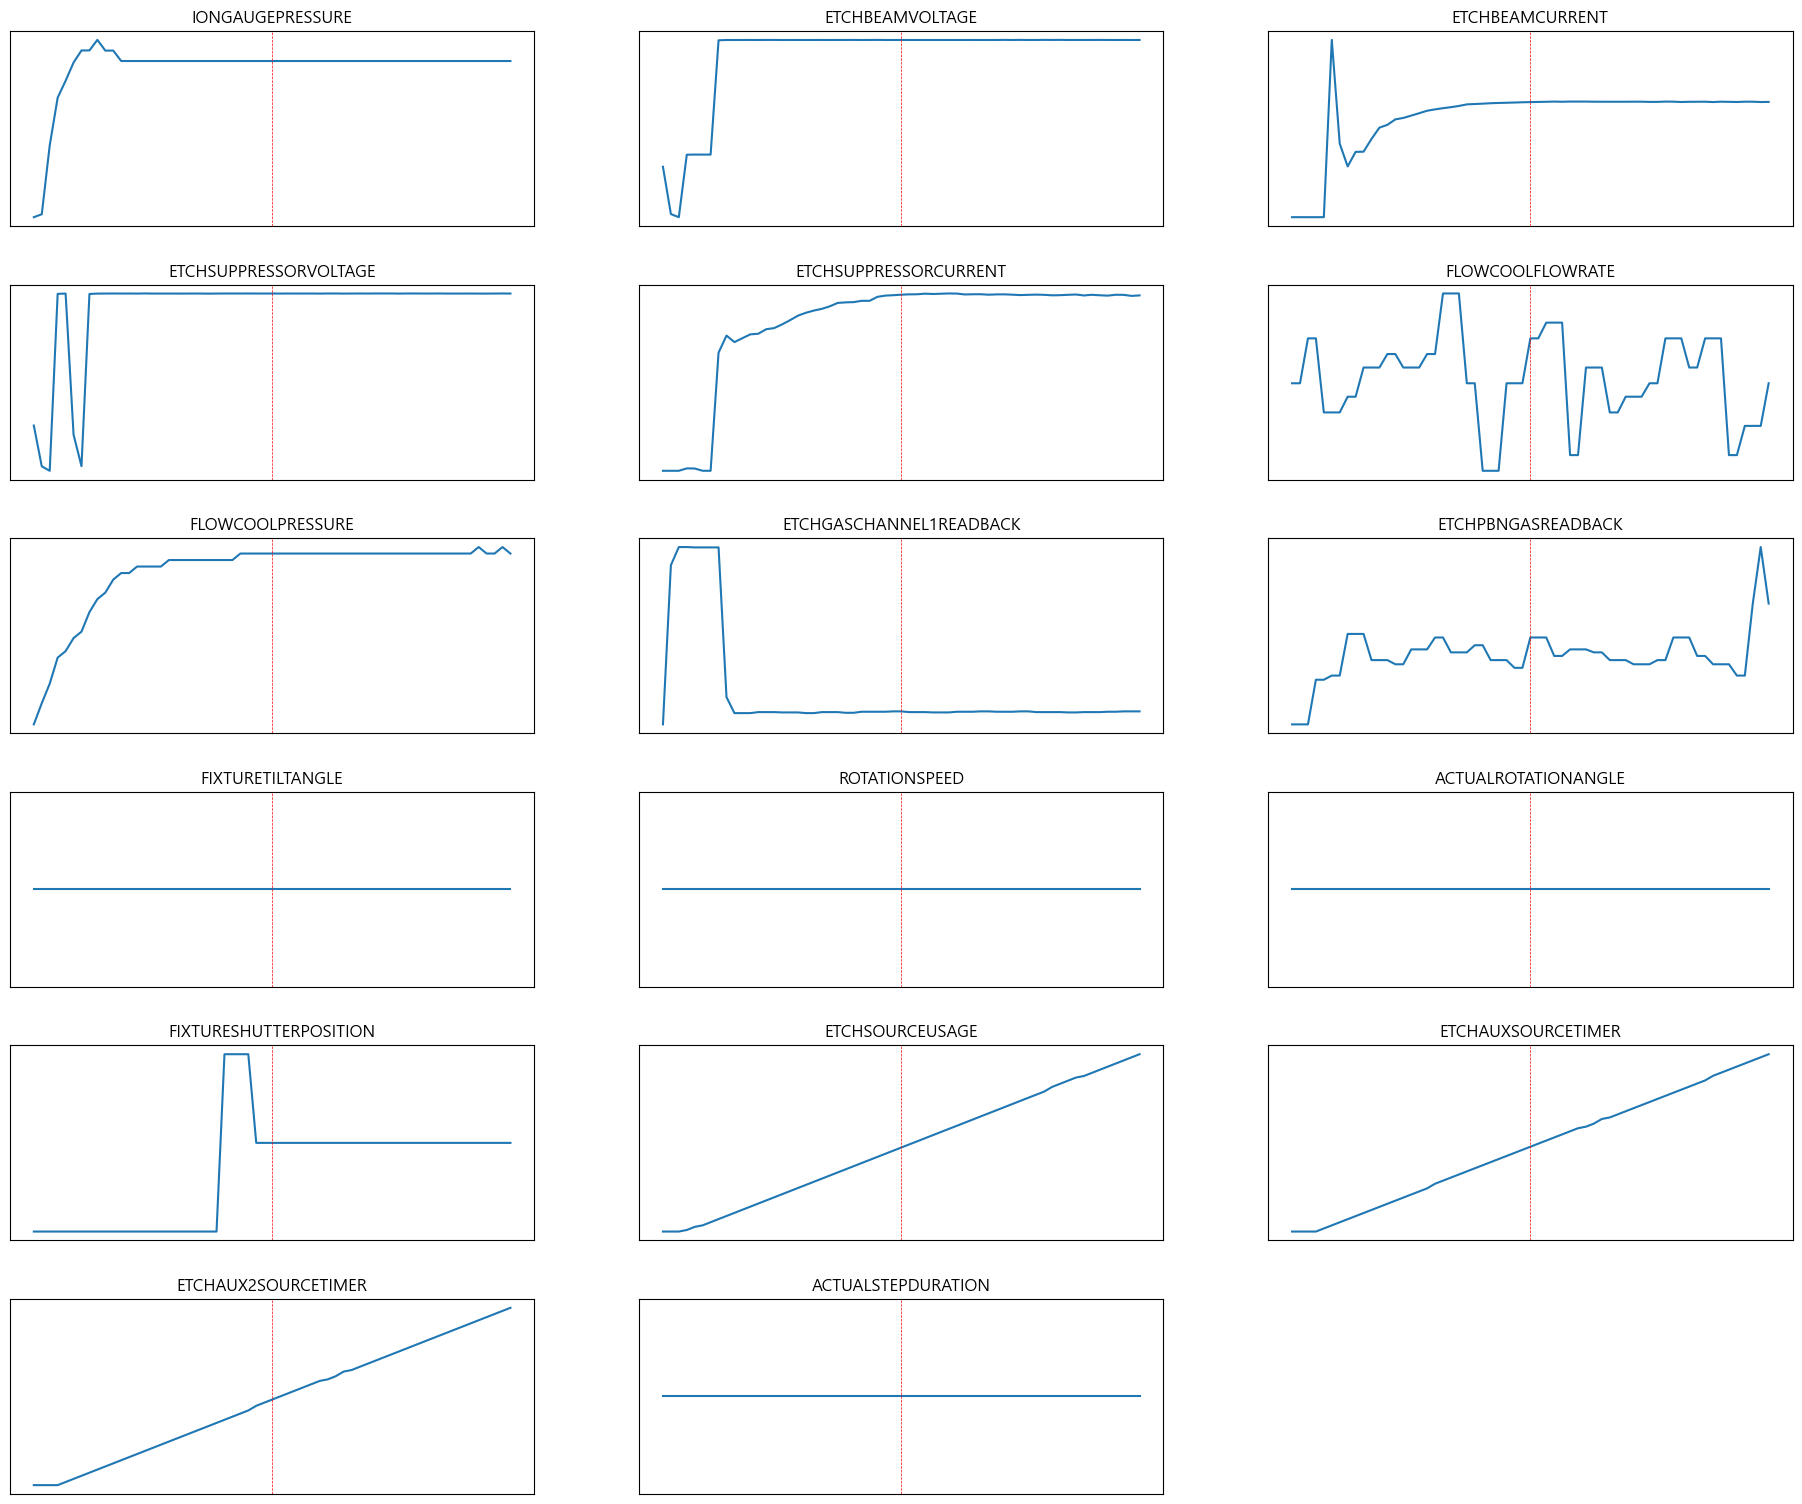

In [146]:
idx = a[a['time'] == 6533184].index[0]
b = a.iloc[idx-30:idx+31,:]
col = a.columns[7:]
plt.figure(figsize=(23,19))

for i in range(1,18):
    plt.subplot(6,3,i)
    plt.plot(b['time'], b[col[i-1]])
    plt.title(col[i-1])
    plt.axvline(6533184, 0, 1, c = 'red', linestyle='--', linewidth=0.5)
    plt.gca().axes.xaxis.set_visible(False)#x범위 없애기
    plt.gca().axes.yaxis.set_visible(False)#x범위 없애기
plt.subplots_adjust(hspace=0.3,wspace=0.2)
plt.show()

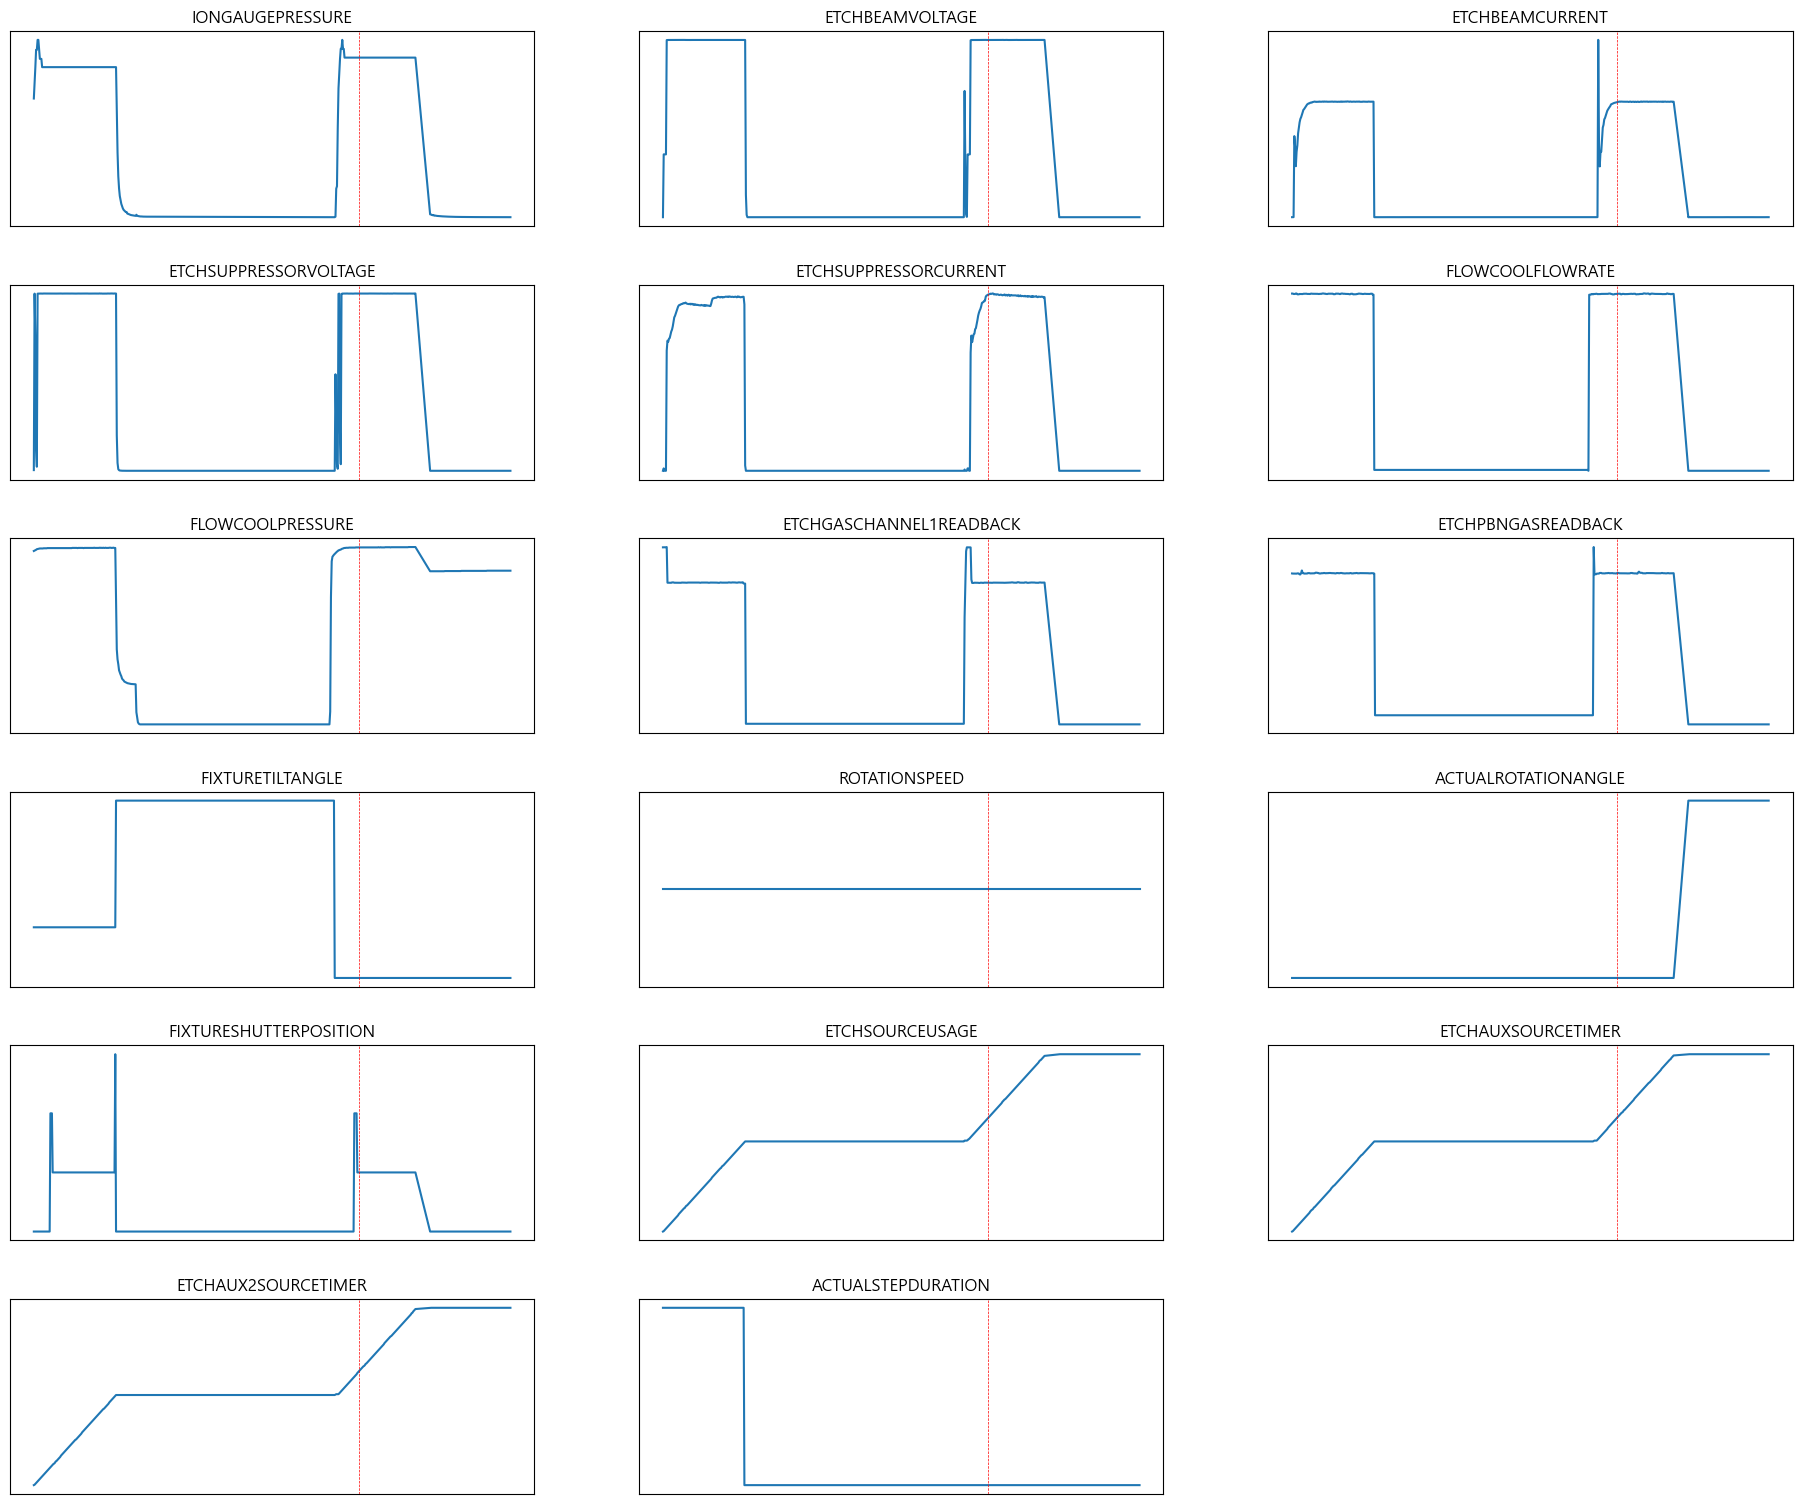

In [156]:
idx = a[a['time'] == 6533184].index[0]
b = a.iloc[idx-200:idx+201,:]
col = a.columns[7:]
plt.figure(figsize=(23,19))

for i in range(1,18):
    plt.subplot(6,3,i)
    plt.plot(b['time'], b[col[i-1]])
    plt.title(col[i-1])
    plt.axvline(6533184, 0, 1, c = 'red', linestyle='--', linewidth=0.5)
    plt.gca().axes.xaxis.set_visible(False)#x범위 없애기
    plt.gca().axes.yaxis.set_visible(False)#x범위 없애기
plt.subplots_adjust(hspace=0.3,wspace=0.2)
plt.show()

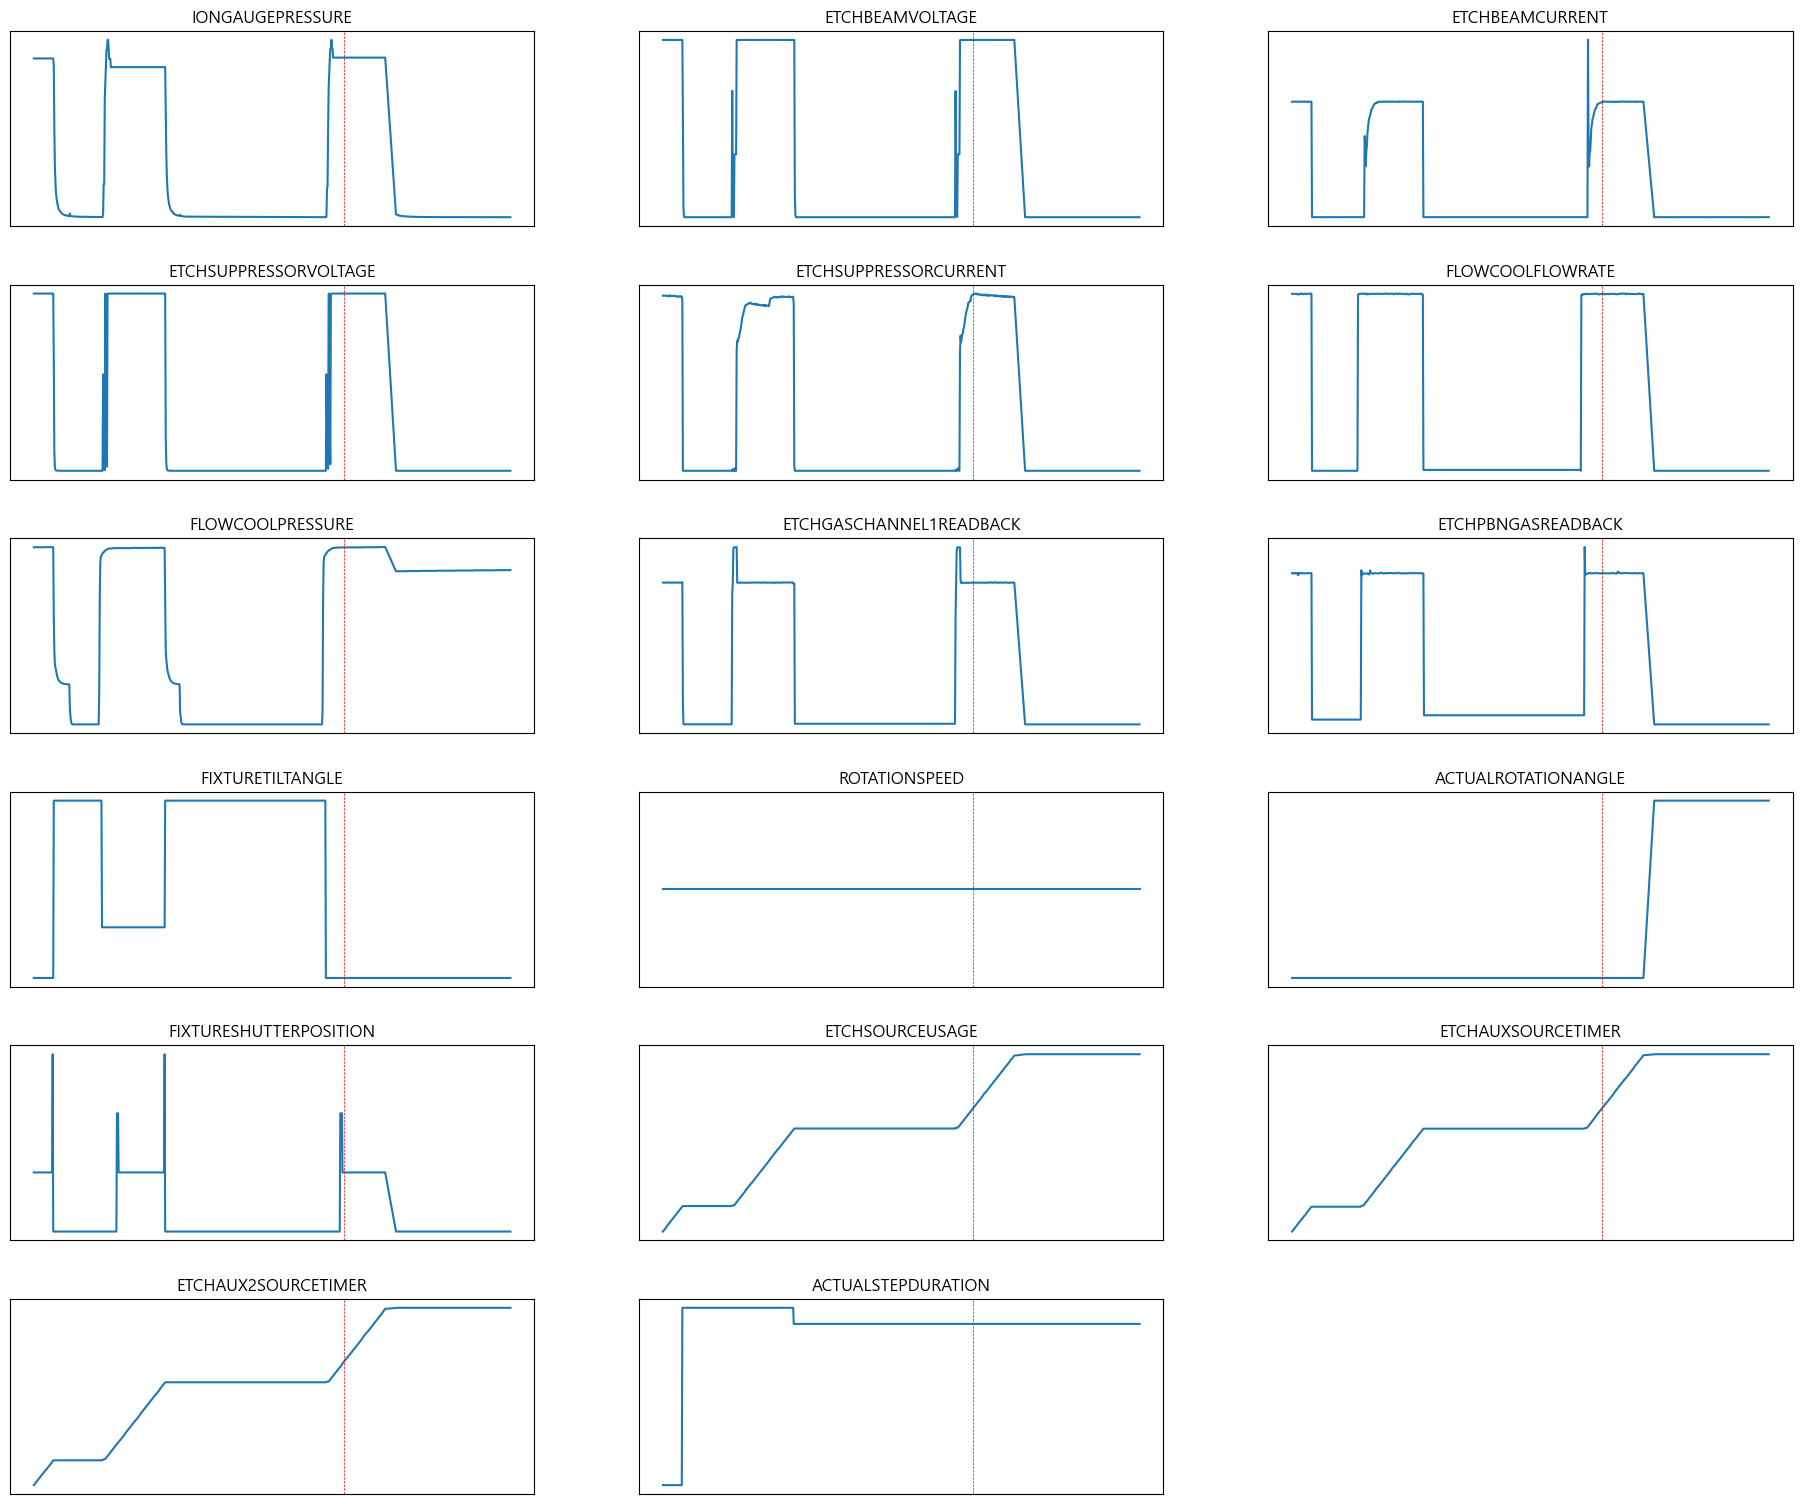

In [155]:
idx = a[a['time'] == 6533184].index[0]
b = a.iloc[idx-300:idx+301,:]
col = a.columns[7:]
plt.figure(figsize=(23,19))

for i in range(1,18):
    plt.subplot(6,3,i)
    plt.plot(b['time'], b[col[i-1]])
    plt.title(col[i-1])
    plt.axvline(6533184, 0, 1, c = 'red', linestyle='--', linewidth=0.5)
    plt.gca().axes.xaxis.set_visible(False)#x범위 없애기
    plt.gca().axes.yaxis.set_visible(False)#y범위 없애기
plt.subplots_adjust(hspace=0.3,wspace=0.2)
plt.show()

In [10]:
# 결측값 확인
f_path = 'train/'
files = glob.glob(f_path + '*.csv')

for file in files:
    temp = pd.read_csv(file)
    print('파일명 : ', file)
    print(temp.isnull().sum())
    print('-'*50)

파일명 :  train\01_M01_DC_train.csv
time                       0
Tool                       0
stage                      0
Lot                        0
runnum                     0
recipe                     0
recipe_step                1
IONGAUGEPRESSURE           0
ETCHBEAMVOLTAGE            0
ETCHBEAMCURRENT            0
ETCHSUPPRESSORVOLTAGE      0
ETCHSUPPRESSORCURRENT      0
FLOWCOOLFLOWRATE           0
FLOWCOOLPRESSURE           0
ETCHGASCHANNEL1READBACK    0
ETCHPBNGASREADBACK         0
FIXTURETILTANGLE           0
ROTATIONSPEED              0
ACTUALROTATIONANGLE        0
FIXTURESHUTTERPOSITION     6
ETCHSOURCEUSAGE            0
ETCHAUXSOURCETIMER         0
ETCHAUX2SOURCETIMER        0
ACTUALSTEPDURATION         0
dtype: int64
--------------------------------------------------
파일명 :  train\01_M02_DC_train.csv
time                       0
Tool                       0
stage                      0
Lot                        0
runnum                     0
recipe                     0


In [16]:
# row개수 확인
f_path = 'train/'
files = glob.glob(f_path + '*.csv')

for file in files:
    temp = pd.read_csv(file)
    print('파일명 : ', file)
    print(len(temp))

파일명 :  train\01_M01_DC_train.csv
3124704
파일명 :  train\01_M02_DC_train.csv
5110542
파일명 :  train\02_M01_DC_train.csv
2865625
파일명 :  train\02_M02_DC_train.csv
4143973
파일명 :  train\03_M01_DC_train.csv
3432217
파일명 :  train\03_M02_DC_train.csv
5060498
파일명 :  train\04_M01_DC_train.csv
5097901
파일명 :  train\04_M02_DC_train.csv
4450348
파일명 :  train\05_M01_DC_train.csv
4779554
파일명 :  train\05_M02_DC_train.csv
1907102
파일명 :  train\06_M01_DC_train.csv
3812209
파일명 :  train\06_M02_DC_train.csv
5102932
파일명 :  train\07_M01_DC_train.csv
5301166
파일명 :  train\07_M02_DC_train.csv
5029138
파일명 :  train\08_M01_DC_train.csv
3716092
파일명 :  train\08_M02_DC_train.csv
5014057
파일명 :  train\09_M01_DC_train.csv
4565604
파일명 :  train\09_M02_DC_train.csv
2754216
파일명 :  train\10_M01_DC_train.csv
3166038
파일명 :  train\10_M02_DC_train.csv
3755524
